In [35]:
import pandas as pd
import numpy as np
import polars as pl

In [36]:
games_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")
records_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/standings.csv", index_col="team")[["season","pct"]].groupby(["team"])["pct"].mean()

weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')#.groupby("month_number")

games_df["home_team_win_perecentage"] = games_df["home_team"].map(records_df)
games_df["away_team_win_perecentage"] = games_df["away_team"].map(records_df)

games_df["month_number"] = pd.to_numeric(games_df['gameday'].str[5:7])

phoenixList = ['ARI', 'LV', 'SD']
d1=dict.fromkeys(phoenixList, 'Phoenix')
columbusList = ['CIN', 'CLE', 'PIT']
d2=dict.fromkeys(columbusList, 'Columbus')
sacramentoList = ['LAR', 'LAC', 'LA', 'SF', 'OAK']
d3=dict.fromkeys(sacramentoList, 'Sacramento')
tallahasseeList = ['JAX', 'TB', 'MIA']
d4=dict.fromkeys(tallahasseeList, 'Tallahassee')
madisonList = ['GB','CHI']
d5=dict.fromkeys(madisonList, 'Madison')
topekaList = ['KC','STL']
d6=dict.fromkeys(topekaList, 'Topeka')
austinList = ['DAL','HOU']
d7=dict.fromkeys(austinList, 'Austin')
trentonList = ['PHI', 'NYJ', 'NYG']
d8=dict.fromkeys(trentonList, 'Trenton')

d = {**d1,**d2,**d3,**d4,**d5,**d6,**d7, **d8, "CAR": "Columbia", "TEN": "Nashville", "BAL": "Annapolis", "WAS": "Washington", "SEA": "Olympia", "DEN": "Denver", "NE": "Providence", "IND": "Indianapolis", "MIN": "Saint Paul", "DET": "Lansing", "BUF": "Albany", "ATL": "Atlanta", "NO": "Jackson"}
games_df['homeTeamNearestWeatherStation'] = games_df['home_team'].map(d)
games_df['awayTeamNearestWeatherStation'] = games_df['away_team'].map(d)

games_df = games_df.loc[games_df['gameday']<='2024-03-01']

In [37]:
weather_df['date']= pd.to_datetime(weather_df['date'])
january_weather_df = weather_df[weather_df['date'].dt.month == 1].groupby('city_name')['avg_temp_c'].mean()
february_weather_df = weather_df[weather_df['date'].dt.month == 2].groupby('city_name')['avg_temp_c'].mean()
september_weather_df = weather_df[weather_df['date'].dt.month == 9].groupby('city_name')['avg_temp_c'].mean()
october_weather_df = weather_df[weather_df['date'].dt.month == 10].groupby('city_name')['avg_temp_c'].mean()
november_weather_df = weather_df[weather_df['date'].dt.month == 11].groupby('city_name')['avg_temp_c'].mean()
december_weather_df = weather_df[weather_df['date'].dt.month == 12].groupby('city_name')['avg_temp_c'].mean()

games_df['avgHomeTeamJanTemp'] = games_df['homeTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamFebTemp'] = games_df['homeTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamSepTemp'] = games_df['homeTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamOctTemp'] = games_df['homeTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamNovTemp'] = games_df['homeTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamDecTemp'] = games_df['homeTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df['avgAwayTeamJanTemp'] = games_df['awayTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamFebTemp'] = games_df['awayTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamSepTemp'] = games_df['awayTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamOctTemp'] = games_df['awayTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamNovTemp'] = games_df['awayTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamDecTemp'] = games_df['awayTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df.loc[games_df['month_number']== 1, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamDecTemp']

games_df.loc[games_df['month_number']== 1, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamDecTemp']

games_df['home_acclimitisation_advantage'] = (games_df['homeAcclimatisedTemp'] - games_df['temp'])-(games_df['awayAcclimatisedTemp']-games_df['temp'])
df = games_df

In [38]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(df.iloc[:, 26:40], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,div_game,roof,temp,wind,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0,dome,0.0,0.0,0.503437,0.519981,9,73.707500,63.875000,0.000000
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0,outdoors,80.0,12.0,0.462116,0.570173,9,61.655000,67.895000,-6.240000
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,1,outdoors,78.0,12.0,0.361333,0.627238,9,65.307826,65.307826,0.000000
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0,outdoors,67.0,10.0,0.614770,0.357639,9,61.655000,69.197391,-7.542391
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,1,dome,0.0,0.0,0.601023,0.491049,9,66.192500,63.560000,0.000000
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0,outdoors,76.0,8.0,0.387948,0.482177,9,79.760000,69.197391,10.562609
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,1,dome,0.0,0.0,0.569373,0.477382,9,70.212500,75.972500,0.000000
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,1,outdoors,73.0,5.0,0.423753,0.697570,9,70.347500,66.837500,3.510000
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,1,outdoors,75.0,3.0,0.578804,0.439898,9,70.347500,90.207500,-19.860000
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0,dome,0.0,0.0,0.573450,0.379236,9,59.240000,60.185000,0.000000


In [39]:
roofMap = {"dome":1, "outdoors":0, "closed":1, "open":0}
df['roof']= df['roof'].map(roofMap)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

In [40]:
df1 = df.iloc[6460]
df1

away_team                               LAC
away_score                             28.0
home_team                               MIN
home_score                             24.0
location                               Home
home_winning_margin                    -4.0
total                                  52.0
overtime                                0.0
away_rest                                 7
home_rest                                10
away_moneyline                       -110.0
home_moneyline                       -110.0
spread_line                             1.0
away_spread_odds                     -115.0
home_spread_odds                     -105.0
total_line                             54.0
under_odds                           -110.0
over_odds                            -110.0
div_game                                  0
indoor_game                               1
temp                                    0.0
wind                                    0.0
home_team_win_perecentage       

In [41]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,20.873993,23.234566,2.360573,44.108559,0.061288,7.472413,7.522070,59.315240,-92.468983,2.313451,...,0.500917,9.866239,53.144501,53.143450,-0.193075,0.565016,0.483895,0.649866,0.474650,0.047122
std,10.065753,10.316932,14.616551,14.208215,0.239876,1.976951,2.098159,244.880739,281.343748,5.962331,...,0.082819,2.753860,14.551758,14.482275,9.967743,0.495792,0.499778,13.463998,0.499394,13.263428
min,0.000000,0.000000,-49.000000,3.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,0.357639,1.000000,17.225600,17.225600,-36.007200,0.000000,0.000000,-39.500000,0.000000,-52.000000
25%,14.000000,16.000000,-7.000000,34.000000,0.000000,7.000000,7.000000,-104.000000,-210.000000,-3.000000,...,0.439898,9.000000,42.582500,42.582500,-4.383499,0.000000,0.000000,-9.000000,0.000000,-8.500000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,0.491049,10.000000,53.652500,53.652500,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
75%,27.000000,30.000000,11.000000,53.000000,0.000000,7.000000,7.000000,187.750000,0.000000,6.500000,...,0.570173,12.000000,64.737500,64.737500,4.042500,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,0.697570,12.000000,90.207500,90.207500,35.184000,1.000000,1.000000,68.500000,1.000000,49.500000


In [42]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6706,6706,6706
unique,35,35,2
top,BAL,NE,Home
freq,222,231,6627


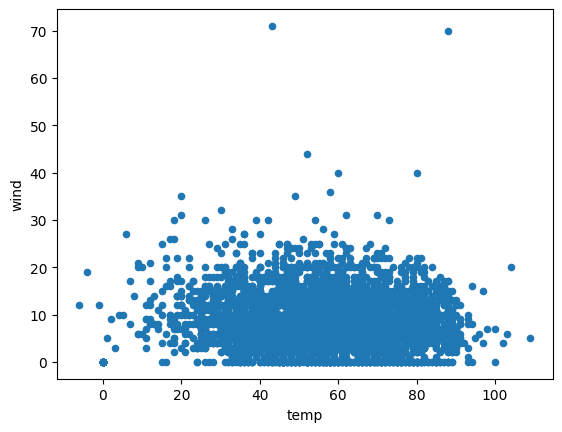

In [43]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [44]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.519981,9,73.7075,63.8750,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.491049,9,66.1925,63.5600,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.477382,9,70.2125,75.9725,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.379236,9,59.2400,60.1850,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,0.587436,9,67.8950,69.2600,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,CLE,14.0,HOU,45.0,Home,31.0,59.0,0.0,6,7,...,0.361333,1,51.6488,28.5440,0.0,1,1,14.0,1,33.5
6695,GB,48.0,DAL,32.0,Home,-16.0,80.0,0.0,7,7,...,0.614770,1,51.6488,21.0200,0.0,0,1,27.5,0,-23.0
6696,LA,23.0,DET,24.0,Home,1.0,47.0,0.0,7,7,...,0.558415,1,23.5025,46.0472,0.0,1,0,-5.5,0,-2.5
6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,7,...,0.451726,1,23.5025,50.8064,0.0,1,1,4.5,1,2.0


In [45]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0.570173,9,61.655000,67.895000,-6.240000,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,0.627238,9,65.307826,65.307826,0.000000,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0.357639,9,61.655000,69.197391,-7.542391,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0.482177,9,79.760000,69.197391,10.562609,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,0.697570,9,70.347500,66.837500,3.510000,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,HOU,10.0,BAL,34.0,Home,24.0,44.0,0.0,7,14,...,0.433344,1,33.915200,51.648800,-17.733600,1,0,0.0,1,14.0
6700,GB,21.0,SF,24.0,Home,3.0,45.0,0.0,6,13,...,0.614770,1,46.047200,21.020000,25.027200,1,0,-5.5,0,-7.5
6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,6,...,0.570173,1,21.214400,31.020800,-9.806400,0,1,5.5,0,-5.5
6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,8,...,0.570173,1,33.915200,31.020800,2.894400,0,0,-17.0,0,-11.5


In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [47]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [48]:
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [49]:
# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\2317046437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \


In [50]:
# removed temp and wind columns as they are irrelant for indoor games
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_7148\2213099128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage']] = \


In [51]:
from sklearn.model_selection import train_test_split

indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.2)

In [52]:
from sklearn.model_selection import train_test_split

outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_train, outdoor_with_acclimitisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)
outdoor_without_acclimitisation_X_train, outdoor_without_acclimitisation_X_test, outdoor_without_acclimitisation_y_train, outdoor_without_acclimitisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)

In [53]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,div_game,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
5312,26,15,0,0.264332,-0.264164,-0.214139,3.068535,1.104572,-1.051337,1.029843,...,-0.763072,0.981640,1.025467,-3.041804,38.3675,33.987200,0.0,0.889731,-0.961954,-0.179516
2101,15,8,0,0.894876,-0.264164,-0.715544,-0.694763,0.955266,-0.845919,0.777646,...,-0.763072,1.386062,0.915593,-3.041804,27.8024,31.020800,0.0,0.889731,1.039551,0.621789
5760,22,1,0,-0.506332,-0.264164,-0.214139,-0.224350,-0.823961,0.816102,-0.819601,...,1.310493,0.139096,0.905420,0.770849,47.1650,44.826957,0.0,-1.123936,-0.961954,-0.179516
803,23,20,0,-0.506332,-0.264164,1.290078,-0.224350,-0.239180,0.341772,1.618302,...,-0.763072,-1.530601,-0.415100,-0.268965,67.8950,70.347500,0.0,-1.123936,-0.961954,-1.286079
2821,21,15,0,1.315238,-0.264164,0.287267,0.246062,0.241916,-0.128822,-0.231142,...,-0.763072,0.981640,2.537247,0.424244,48.3950,45.942500,0.0,0.889731,1.039551,1.537565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,8,0,0.124212,-0.264164,0.287267,0.246062,-0.239180,0.341772,0.609515,...,-0.763072,1.386062,-0.742686,-3.041804,27.8024,57.027200,0.0,0.889731,-0.961954,-0.141358
2118,1,13,0,1.315238,-0.264164,-0.214139,-0.224350,0.391222,-0.263278,0.105121,...,-0.763072,0.350498,0.066107,-0.268965,63.8750,73.707500,0.0,0.889731,1.039551,1.384936
1076,32,1,0,-1.627298,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,-1.492126,...,1.310493,0.139096,-0.592118,-0.268965,73.7075,79.760000,0.0,-1.123936,-0.961954,-1.095292
5455,1,15,0,-1.347056,-0.264164,3.295700,3.068535,1.846953,-2.082163,1.954564,...,1.310493,0.981640,0.066107,0.424244,48.3950,52.145000,0.0,-1.123936,-0.961954,-2.354485


In [54]:
indoor_X_train.corr()

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,div_game,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
away_team,1.000000,-0.058994,0.044807,-0.065303,0.033902,0.000630,0.005018,-0.028105,0.017377,-0.084061,...,0.049938,0.015546,-0.005118,0.000149,0.038127,0.034066,NaN,-0.060788,-0.027216,-0.032360
home_team,-0.058994,1.000000,0.080416,0.040510,-0.020998,0.053107,0.031336,-0.014771,0.023581,0.103712,...,-0.003668,0.050848,-0.032767,-0.016916,-0.280701,-0.012921,NaN,0.018804,-0.006016,-0.004155
location,0.044807,0.080416,1.000000,-0.036371,0.022908,0.227122,0.211027,-0.012716,0.013126,-0.050684,...,-0.064346,0.091635,0.024618,-0.211733,-0.110319,-0.123216,NaN,-0.077291,-0.033885,-0.016207
home_winning_margin,-0.065303,0.040510,-0.036371,1.000000,-0.042069,-0.000640,0.053095,0.340705,-0.329398,0.417454,...,0.013414,0.119288,-0.137306,-0.021102,-0.049150,0.034587,NaN,0.776704,0.676536,0.904255
overtime,0.033902,-0.020998,0.022908,-0.042069,1.000000,0.026476,-0.014123,0.025014,-0.021833,-0.003626,...,0.012816,0.005016,0.022007,-0.059800,0.050931,0.023443,NaN,-0.027777,-0.091481,-0.044589
away_rest,0.000630,0.053107,0.227122,-0.000640,0.026476,1.000000,0.314033,0.024904,-0.024424,0.026639,...,-0.044657,0.078383,0.019741,-0.022188,-0.015923,-0.017344,NaN,0.003577,-0.000091,-0.013221
home_rest,0.005018,0.031336,0.211027,0.053095,-0.014123,0.314033,1.000000,0.065961,-0.059212,0.095564,...,-0.074018,0.068748,0.035449,-0.139001,-0.051612,-0.005729,NaN,0.035952,-0.002501,0.013521
away_moneyline,-0.028105,-0.014771,-0.012716,0.340705,0.025014,0.024904,0.065961,1.000000,-0.971822,0.819651,...,0.002112,0.255238,-0.270188,-0.040240,-0.002178,0.033472,NaN,0.316747,-0.070917,-0.010234
home_moneyline,0.017377,0.023581,0.013126,-0.329398,-0.021833,-0.024424,-0.059212,-0.971822,1.000000,-0.778601,...,0.002613,-0.242235,0.252058,0.033127,-0.012297,-0.031096,NaN,-0.301804,0.054540,0.003386
spread_line,-0.084061,0.103712,-0.050684,0.417454,-0.003626,0.026639,0.095564,0.819651,-0.778601,1.000000,...,0.012186,0.258583,-0.268144,-0.044318,-0.048139,0.057501,NaN,0.366457,-0.075625,-0.010522


In [55]:
indoor_y_train

5312    0
2101    0
5760    0
803     1
2821    0
       ..
1823    0
2118    0
1076    1
5455    0
1976    0
Name: over_totals_win, Length: 1300, dtype: int32

In [56]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,div_game,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
5561,5,13,0,-0.296151,-0.264164,-0.214139,-0.694763,-1.193078,1.099953,-1.323995,...,1.310493,0.350498,-0.459863,0.770849,22.1300,26.315000,0.0,-1.123936,1.039551,0.278373
255,20,20,0,0.684695,-0.264164,-0.214139,3.068535,-0.239180,0.341772,0.777646,...,-0.763072,-1.530601,0.276698,-3.041804,31.0208,17.225600,0.0,0.889731,1.039551,0.392845
1389,11,5,0,-2.117721,-0.264164,-0.715544,-0.224350,-0.239180,0.341772,0.105121,...,1.310493,-1.447952,1.483274,0.077639,51.5750,49.437500,0.0,-1.123936,-0.961954,-2.354485
1347,5,13,0,0.194272,-0.264164,-0.214139,-0.694763,-0.239180,0.341772,1.618302,...,1.310493,0.350498,-0.459863,-0.268965,63.8750,61.655000,0.0,0.889731,-0.961954,-0.522932
4222,14,7,0,0.264332,-0.264164,1.290078,-0.224350,1.195814,-1.152179,1.029843,...,1.310493,-0.756555,-1.403963,0.770849,54.2300,56.930000,0.0,0.889731,-0.961954,-0.179516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,10,0,0,-0.156030,3.785524,-0.214139,-0.224350,-0.848845,0.838511,-0.819601,...,-0.763072,-0.672811,-1.514854,-0.268965,90.2075,60.185000,0.0,-1.123936,1.039551,0.202058
3750,31,4,0,1.525419,-0.264164,-0.214139,-0.224350,0.395369,-0.293157,0.189186,...,-0.763072,0.855002,-1.597187,-0.268965,80.4950,67.895000,0.0,0.889731,1.039551,1.575722
2555,33,5,0,-2.748264,-0.264164,-1.718355,-1.635587,-2.437293,2.134514,-2.248717,...,-0.763072,-1.447952,-0.028507,0.424244,39.6800,48.072500,0.0,-1.123936,-0.961954,-1.972911
6163,6,4,0,0.054151,-0.264164,-0.214139,-0.224350,-1.495837,1.312841,-1.660257,...,-0.763072,0.855002,-0.154658,-0.268965,80.4950,65.307826,0.0,0.889731,1.039551,0.812575


In [57]:
indoor_y_test

5561    1
255     1
1389    1
1347    1
4222    1
       ..
5326    1
3750    0
2555    1
6163    0
6008    1
Name: over_totals_win, Length: 325, dtype: int32

In [58]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
indoor_model = LogisticRegression(max_iter=1000)
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.5138461538461538


In [59]:
from sklearn.linear_model import LogisticRegression

outdoor_with_acclimitisation_model = LogisticRegression(max_iter=1000)
outdoor_with_acclimitisation_model.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)
print(outdoor_with_acclimitisation_model.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test)) 

outdoor_with_acclimitisation_X_train

0.5368731563421829


,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,wind,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
4664,27,7,0,-1.182052,-0.252707,-0.247047,1.179364,-1.499073,1.277550,-1.725339,...,3.377271,-1.693057,1.491697,0.407769,-0.726290,-0.721314,0.022256,-1.144813,-0.946891,-0.534053
4200,24,31,0,-0.502839,-0.252707,-0.247047,-0.256846,-0.999167,0.909810,-0.971099,...,-0.377164,-0.101755,-0.927592,0.776823,-0.665897,-0.865629,0.278375,-1.144813,-0.946891,-0.120898
2623,5,11,0,0.312216,-0.252707,-0.754423,-0.256846,0.358301,-0.228432,0.118359,...,-1.449860,-0.842159,-0.471481,0.776823,0.078957,-1.868540,0.022256,0.873505,1.056087,0.292256
3080,14,21,0,0.108452,-0.252707,-0.247047,-0.256846,0.882592,-0.778291,0.956403,...,-0.377164,-0.460624,-1.353295,0.407769,-0.286583,0.431643,-0.883660,0.873505,-0.946891,-0.308696
1581,6,7,0,-1.114131,-0.252707,-0.247047,-0.256846,-0.243212,0.324929,-0.971099,...,-0.555947,-1.693057,-0.186412,-0.330341,0.861446,0.840124,0.022256,-1.144813,-0.946891,-0.796969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,29,17,0,-0.706603,-0.252707,-0.247047,1.179364,-1.149545,1.011377,-1.138708,...,0.874314,-0.430403,0.852192,0.038714,1.208951,-0.230018,1.797406,-1.144813,-0.946891,-0.271136
4234,31,27,0,0.787665,-0.252707,-0.247047,-0.256846,1.569455,-1.531282,1.459230,...,-0.555947,0.813362,-1.533772,0.776823,-0.967219,-1.276692,0.422626,0.873505,1.056087,0.217137
5903,10,5,0,0.515980,-0.252707,-0.247047,-0.256846,0.301401,-0.193409,0.118359,...,-0.734729,-0.502177,-1.456871,0.038714,-0.259565,-0.113836,-0.164430,0.873505,1.056087,0.517612
4434,15,23,0,-1.114131,-0.252707,-0.247047,-0.256846,-0.877239,0.818751,-0.887294,...,-0.913512,-1.736709,0.813231,0.776823,-0.440216,-1.276692,1.074245,-1.144813,-0.946891,-0.834528


In [60]:
outdoor_without_acclimitisation_model = LogisticRegression(max_iter=1000)
outdoor_without_acclimitisation_model.fit(outdoor_without_acclimitisation_X_train, outdoor_without_acclimitisation_y_train)
print(outdoor_without_acclimitisation_model.score(outdoor_without_acclimitisation_X_test, outdoor_without_acclimitisation_y_test)) 

0.5634218289085545


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_with_acclimitisation_y_pred = outdoor_with_acclimitisation_model.predict(outdoor_with_acclimitisation_X_test)
outdoor_without_acclimitisation_y_pred = outdoor_without_acclimitisation_model.predict(outdoor_without_acclimitisation_X_test)

print(tabulate(
    [
        ['Indoor', 
         round(accuracy_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(f1_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(precision_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(recall_score(indoor_y_test, indoor_y_pred)*100, 1)], 

        ['Outdoor with acclimitisation', 
         round(accuracy_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(f1_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(precision_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(recall_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1)],

        ['Outdoor without acclimitisation', 
         round(accuracy_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(f1_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(precision_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(recall_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1)]

    ], headers=['Model', 'Accuracy score', 'F1 score', 'Precision score', 'Recall score'], tablefmt='grid'
))


+---------------------------------+------------------+------------+-------------------+----------------+
| Model                           |   Accuracy score |   F1 score |   Precision score |   Recall score |
+=================================+==================+============+===================+================+
| Indoor                          |             51.4 |       55.9 |              52.4 |           59.9 |
+---------------------------------+------------------+------------+-------------------+----------------+
| Outdoor with acclimitisation    |             53.7 |       39.7 |              60.8 |           29.5 |
+---------------------------------+------------------+------------+-------------------+----------------+
| Outdoor without acclimitisation |             56.3 |       43.5 |              52.8 |           37   |
+---------------------------------+------------------+------------+-------------------+----------------+


In [66]:
new_game = [[
    23,#away_team
    3,#home_team
    0,#location
    outdoor_df['home_winning_margin'].median(),#home_winning_margin
    0,#overtime
    7,#away_rest
    7,#home_rest
    outdoor_df['away_moneyline'].median(),#away_moneyline
    outdoor_df['home_moneyline'].median(),#home_moneyline
    outdoor_df['spread_line'].median(),#spread_line
    outdoor_df['away_spread_odds'].median(),#away_spread_odds
    outdoor_df['home_spread_odds'].median(),#home_spread_odds
    outdoor_df['total_line'].median(),#total_line
    outdoor_df['under_odds'].median(),#under_odds
    outdoor_df['over_odds'].median(),#over_odds
    outdoor_df['temp'].median(),#temp
    outdoor_df['wind'].median(),#wind
    1,#div_game
    1,#home_win
    1,#home_spread_win
    4,#home_spread_winning_margin
    0.5,#home_team_win_perecentage
    0.5,#away_team_win_perecentage
    11,#month_number
    outdoor_df['homeAcclimatisedTemp'].median(),#homeAcclimatisedTemp
    outdoor_df['awayAcclimatisedTemp'].median(),#awayAcclimatisedTemp
    outdoor_df['home_acclimitisation_advantage'].median()#home_acclimitisation_advantage
]]

new_game_with_scaling = scaler.transform(new_game)
prediction = outdoor_with_acclimitisation_model.predict(new_game_with_scaling)

if prediction ==1:
    print("Over")
else:
    print("Under")

Over


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
